# Some Functions
statistics.median(X) median value

statistics.median_low(X) lower median in case of 2 median values , even No.s case

statistics.median_high(X) upper median in case of 2 median values , even No.s case

statistics.variance(X) varince of data , do not work in ase of nan values

statistics.quantiles(X) quantile values for X / np.quantile(X, [0.25, 0.5, 0.75])

np.ptp(X) difference B/W min n max values

np.min(X) / np.nanmin(X) ignore null values 

np.amin(X) i don't know once try it

scipy.stats.describe(X) mean , min/max , skewness , kurtosis , variance , No.of observations etc



In [1]:
import numpy as np

[[9.17 9.17]
 [9.17 9.17]]


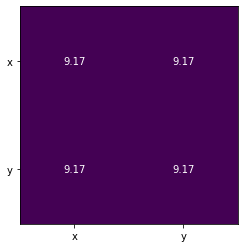

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9 , 10])
y = np.array(np.arange(50,60,1))
import matplotlib.pyplot as plt
#### Heatmap for 2 variables
matrix = np.cov(x, y).round(decimals=2) # correlation matrix (array form)
print(matrix)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()


In [1]:
import pandas as pd
import numpy as np

In [5]:
print(np.repeat(['daily' , 'weekly'] , 15) , "-------------") # Gives 15 of each
print(np.random.choice(['daily' , 'weekly'] , 15)) # Gives total 15

['daily' 'daily' 'daily' 'daily' 'daily' 'daily' 'daily' 'daily' 'daily'
 'daily' 'daily' 'daily' 'daily' 'daily' 'daily' 'weekly' 'weekly'
 'weekly' 'weekly' 'weekly' 'weekly' 'weekly' 'weekly' 'weekly' 'weekly'
 'weekly' 'weekly' 'weekly' 'weekly' 'weekly'] -------------
['daily' 'weekly' 'daily' 'daily' 'daily' 'weekly' 'daily' 'weekly'
 'daily' 'daily' 'daily' 'daily' 'weekly' 'daily' 'weekly']


In [9]:
np.tile(np.repeat(['daily' , 'weekly'] , 5) , 2) #Construct an array by repeating A the number of times given by reps.


array(['daily', 'daily', 'daily', 'daily', 'daily', 'weekly', 'weekly',
       'weekly', 'weekly', 'weekly', 'daily', 'daily', 'daily', 'daily',
       'daily', 'weekly', 'weekly', 'weekly', 'weekly', 'weekly'],
      dtype='<U6')

In [10]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
df[:10]

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit() #Create a Model from a formula and dataframe.

model

In [14]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


1. Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

2. And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

### A two-way ANOVA with interaction tests three null hypotheses at the same time:

There is no difference in group means at any level of the first independent variable.

There is no difference in group means at any level of the second independent variable.

The effect of one independent variable does not depend on the effect of the other independent variable (a.k.a. no interaction effect).

# Z-test

X - u0 / std() sqrt(No.of samples)

X = sample mean

u0 = hypothesis mean / population mean

std() = standard diviation


Hypothsis : Test weather the weight is greater than 30 lbs

Null : ho/u0 = 30

Alternate : h1 > 30

In this example:

Mean Score for Girls is 641
The size of the sample is 20
The population mean is 600
Standard Deviation for Population is 100

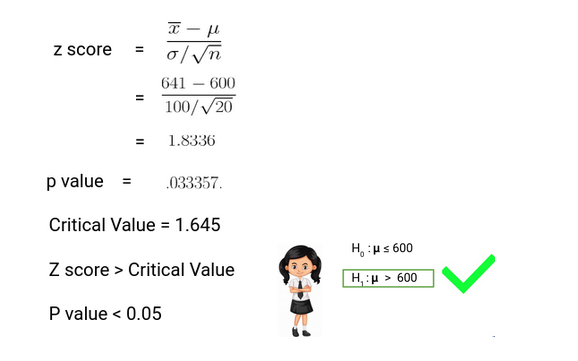

Here P-value : the Z-values(z-table) then we subtract it from 1 bcz we need average score greater then 600

# Manova Test
1. Dependent varibales are continous , and normally distributed . 
2. There must be a linear pattern B/W all pairs of dependent variables . 
### One-way manova : 
1. When 2 or more dpendent varibles and 1 independent varible . 

In [1]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
df.columns = df.columns.str.replace(".", "_")
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# We will be using width n lenght columns and 1 independent column ( species )
maov = MANOVA.from_formula('Sepal_Length + Sepal_Width + \
                            Petal_Length + Petal_Width  ~ Species', data=df)

In [5]:
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

### Another example of Manova test

In [10]:
%cd Downloads/

C:\Users\Ali\Downloads


In [11]:
df = pd.read_csv('MANOVA_example.csv')
df

,Method,Test,Satisfaction
0,1,3.000,3.001
1,1,2.990,2.994
2,1,3.041,3.032
3,1,3.063,3.059
4,1,3.035,3.026
5,1,3.009,3.003
6,1,3.032,3.025
7,1,3.026,3.024
8,1,3.039,3.030
9,1,3.015,3.011


In [13]:
maov1 = MANOVA.from_formula('Test + Satisfaction  ~ Method', data=df)

In [14]:
print(maov1.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda    0.0002 2.0000 45.0000 131226.2913 0.0000
         Pillai's trace    0.9998 2.0000 45.0000 131226.2913 0.0000
 Hotelling-Lawley trace 5832.2796 2.0000 45.0000 131226.2913 0.0000
    Roy's greatest root 5832.2796 2.0000 45.0000 131226.2913 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
            Method          Value   Num DF   Den DF  F Value  Pr > F
--------------------------------------------------------------------
             Wilks' lambda  0.5423  2.0000  45.0000  18.9867  0.00

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Satisfaction', ylabel='Test'>

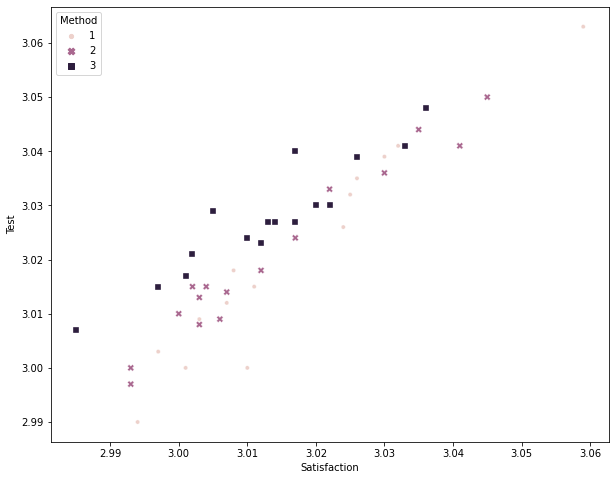

In [24]:
plt.figure(figsize = (10,8))
sns.scatterplot(df['Satisfaction'] , df['Test'] , hue = df['Method'] , style = df['Method'] , size = df['Method'] )